In regression analysis, <Strong>heteroscedasticity</Strong> (sometimes spelled heteroskedasticity) refers to the unequal scatter of residuals or error terms. Specfically, it refers to the case where there is a systematic change in the spread of the residuals over the range of measured values.

Heteroscedasticity is a problem because ordinary least squares (OLS) regression assumes that the residuals come from a population that has homoscedasticity, which means constant variance.

When heteroscedasticity is present in a regression analysis, the results of the analysis become hard to trust. Specifically, heteroscedasticity increases the variance of the regression coefficient estimates, but the regression model doesn’t pick up on this.

This makes it much more likely for a regression model to declare that a term in the model is statistically significant, when in fact it is not.

In [1]:
import numpy as np
import pandas as pd

In [2]:
#create dataset
df = pd.DataFrame({'rating': [90, 85, 82, 88, 94, 90, 76, 75, 87, 86],
                   'points': [25, 20, 14, 16, 27, 20, 12, 15, 14, 19],
                   'assists': [5, 7, 7, 8, 5, 7, 6, 9, 9, 5],
                   'rebounds': [11, 8, 10, 6, 6, 9, 6, 10, 10, 7]})

In [3]:
df

,rating,points,assists,rebounds
0,90,25,5,11
1,85,20,7,8
2,82,14,7,10
3,88,16,8,6
4,94,27,5,6
5,90,20,7,9
6,76,12,6,6
7,75,15,9,10
8,87,14,9,10
9,86,19,5,7


In [4]:
import statsmodels.formula.api as smf

#fit regression model
fit = smf.ols('rating ~ points+assists+rebounds', data=df).fit()

#view model summary
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     3.299
Date:                Fri, 24 Sep 2021   Prob (F-statistic):             0.0995
Time:                        21:26:40   Log-Likelihood:                -26.862
No. Observations:                  10   AIC:                             61.72
Df Residuals:                       6   BIC:                             62.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.4716     14.588      4.282      0.0

C:\Users\smattoo5\anaconda3\envs\AIML2\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


# Perform a Breusch-Pagan test

In [5]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [6]:
#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']

test = sms.het_breuschpagan(fit.resid, fit.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 6.003951995818529),
 ('p-value', 0.11141811013399114),
 ('f-value', 3.0049448803097385),
 ('f p-value', 0.11663863538254496)]

A Breusch-Pagan test uses the following null and alternative hypotheses:

The <strong>null hypothesis (H0)</strong>: Homoscedasticity is present.

The <strong>alternative hypothesis: (Ha)</strong>: Homoscedasticity is not present (i.e. heteroscedasticity exists)

In this example, the Lagrange multiplier statistic for the test is <strong>6.004</strong> and the corresponding p-value is <strong>0.1114</strong>. 

Because this p-value is not less than 0.05, we fail to reject the null hypothesis. We do not have sufficient evidence to say that heteroscedasticity is present in the regression model.

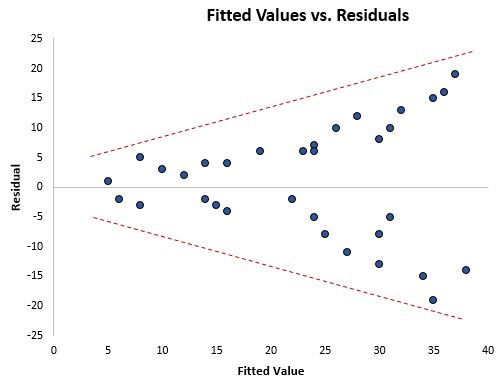